In [8]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

# loading haberman survival data using csv file.
# use this link to dowload data :  https://www.kaggle.com/gilsousa/habermans-survival-data-set
df = pd.read_csv('haberman.csv')

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# info gives us a structural information about dataset such as columns,null-count, datatype of each feature

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [11]:
# describe gives us statistical information of data for each feature(column) such as mean,median,quartile,min,max etc

df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
# head gives us some values from start such as head(10)--> top 10 rows data
# default value is 5 i.e. head()--> top 5 rows

# similar as head we can use tail to get some rows from bottom or last
# df.tail(6)--> last 10 rows from dataset.

df.head(6)


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1


In [13]:
# print the names of all the columns of dataframe

df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [14]:
# gives the count of datapoints belongs to each class

df['status'].value_counts()

# from below output we can observe that dataset is balanced or imbalanced.
# this dataset is imbalanced as class 1 has 225 and class 2 has 81 only.

1    225
2     81
Name: status, dtype: int64

# Exploratory Data Analysis 

### Scatterplots

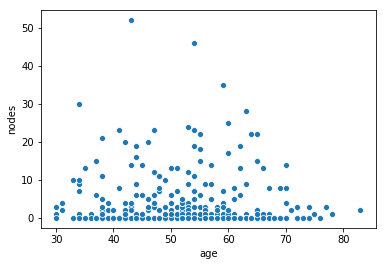

In [75]:
# 2-D scatterplot using seaborn  
sns.scatterplot(x='age',y='nodes',data=df)

# below code that is commented is same scatter-plot but using matplotlib library
# plt.scatter(x='age',y='nodes',data=df)

#### Observations :

1- Outliers : In above plot the datapoint where nodes are more than 40 and age is more than 80 can consider as outliers.

2- But the above plot is not very good to distinguish between status 1 & 2 as both plotted with same color i.e. blue. 

Below Plot will give you a clear picture of data classification.
Blue : Survival of patient is more than or equal to 5 years.
Orange : Survival of patient is less than 5 years.

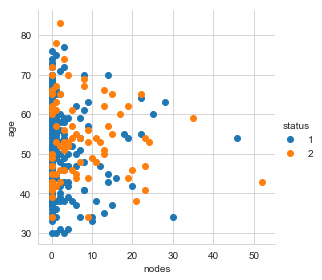

In [87]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='status',size=4).map(plt.scatter, 'nodes','age').add_legend();
plt.show();

### Pair-Plots

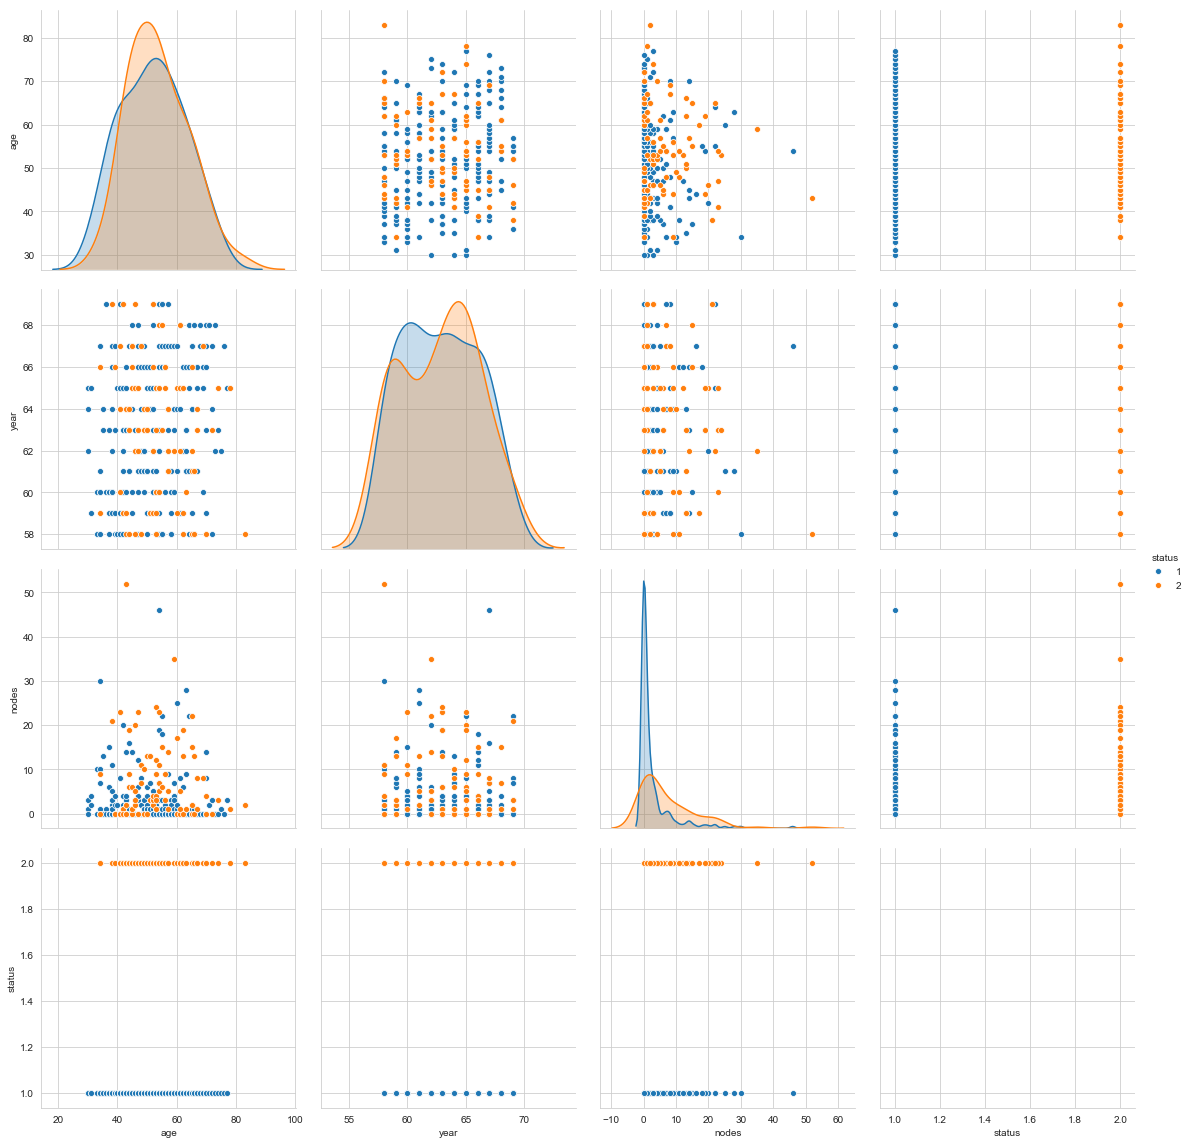

In [49]:
#pair plot of all the features of dataset.This will give you a clear picture of all the combination of plots that  
# we can draw in between the each pair of features.

sns.set_style('whitegrid') # either use whitegrid, darkgrid, dark, white to get background on plots
sns.pairplot(data=df,hue='status',size=4)


We need to select some of the plots which have some relevent correlation between the features.
Among all the plots above we have one plot that is between Age and Nodes, is relevent for our analysis.

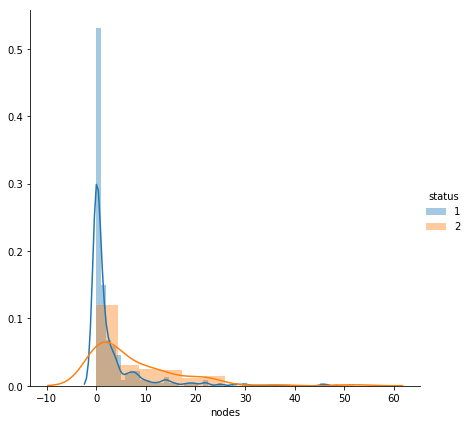

In [26]:
# Distribution plot of Nodes using color coding for every status class

sns.FacetGrid(data=df,hue='status',size=6).map(sns.distplot,'nodes').add_legend()

# By seeing below plot : we can clearly separate status 1 and status 2 on the basis of Nodes

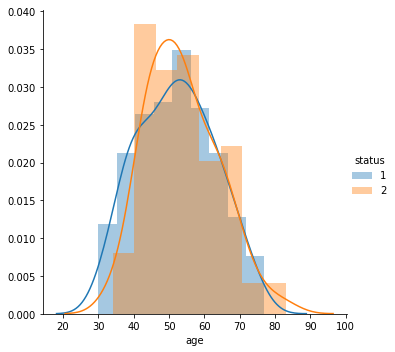

In [24]:
# Distribution plot of Age using color coding for every status class

sns.FacetGrid(data=df,hue='status',size=5).map(sns.distplot,'age').add_legend()

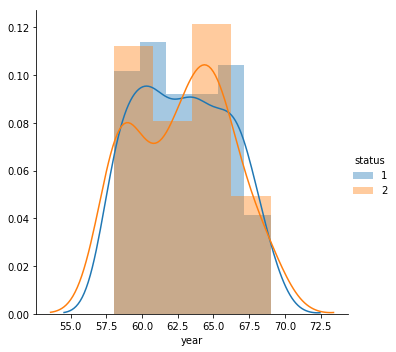

In [25]:
# Distribution plot of Year using color coding for every status class

sns.FacetGrid(data=df,hue='status',size=5).map(sns.distplot,'year').add_legend()

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


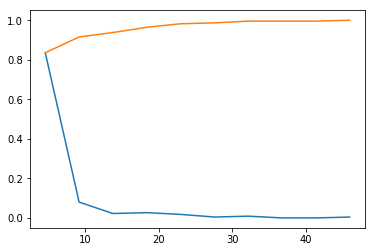

In [46]:
status_1 = df.loc[df['status']==1]
counts,bin_edge = np.histogram(status_1['nodes'],bins=10,density=True)

pdf = counts/(sum(counts)) 

cdf = np.cumsum(pdf)
print(bin_edge)
print(pdf)
print(cdf)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


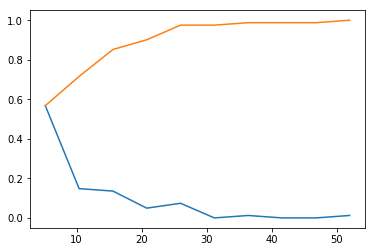

In [47]:
status_2 = df.loc[df['status']==2]

counts,bin_edge = np.histogram(status_2['nodes'],bins=10,density=True)

pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)

print(pdf)
print(cdf)
print(bin_edge)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

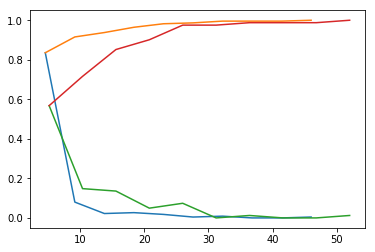

In [48]:
status_1 = df.loc[df['status']==1]
counts,bin_edge = np.histogram(status_1['nodes'],bins=10,density=True)
pdf = counts/(sum(counts)) 
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)


status_2 = df.loc[df['status']==2]
counts,bin_edge = np.histogram(status_2['nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

plt.show()

### Mean , Variance , Std- Deviation 

In [55]:
print('Means')
print(np.mean(status_1['nodes']))
print(np.mean(status_2['nodes']))
print('\n')
print('Standard Deviation')
print(np.std(status_1['nodes']))
print(np.std(status_2['nodes']))

Means
2.7911111111111113
7.45679012345679


Standard Deviation
5.857258449412131
9.128776076761632


### Median, Percentile, Quantile, IQR, MAD

In [62]:
print("Medians: ")

print(np.median(status_1["nodes"]));
print(np.median(status_2["nodes"]))

print('Quartiles')
print(np.percentile(status_1['nodes'],np.arange(0,100,25)))
print(np.percentile(status_2['nodes'],np.arange(0,100,25)))

print('90th percentile')
print(np.percentile(status_1['nodes'],90))
print(np.percentile(status_2['nodes'],90))

Medians : 
0.0
4.0
Quartiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]
90th percentile
8.0


### Box Plot And Whiskers

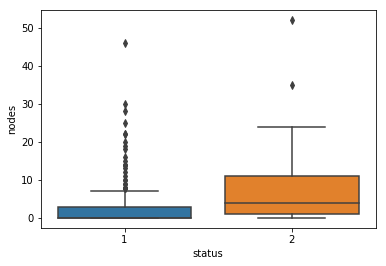

In [67]:
sns.boxplot(x='status',y='nodes',data=df)

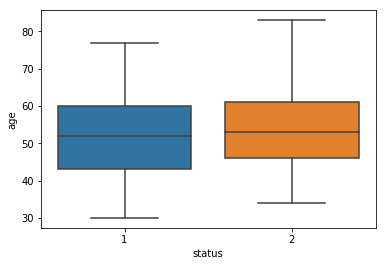

In [68]:
sns.boxplot(x='status',y='age',data=df)

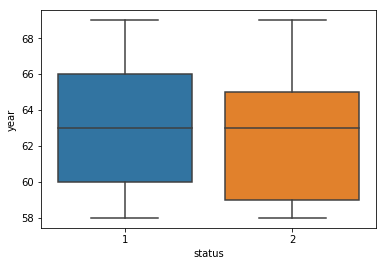

In [69]:
sns.boxplot(x='status',y='year',data=df)

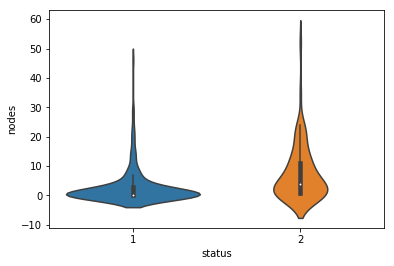

In [70]:
sns.violinplot(x='status',y='nodes',data=df)

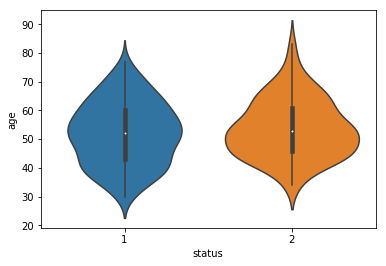

In [71]:
sns.violinplot(x='status',y='age',data=df)

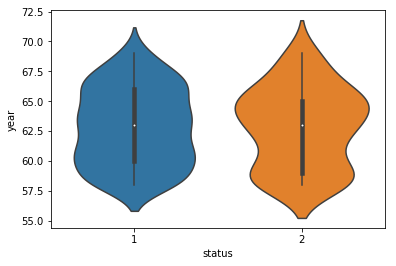

In [72]:
sns.violinplot(x='status',y='year',data=df)